In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
def generate_cop_data():
    # Extracted data from the Bosch document
    indoor_temps_f = np.array([60, 70, 75, 80])
    outdoor_temps_f = np.array([86, 72, 67, 62, 57, 52, 47, 42, 37, 32, 27, 22, 17, 12, 7, 2, -4])
    
    heating_capacity_btu = np.array([
        [67.4, 67.4, 67.4, 64.6, 61.5, 57.9, 54.6, 51.5, 47.6, 44.9, 42.7, 41.4, 41.3, 39.9, 37.9, 36.1, 34.2],  # 60°F
        [52.4, 52.4, 52.4, 52.3, 52.3, 51.8, 51.8, 50.9, 47.0, 44.0, 41.7, 40.4, 40.4, 39.0, 37.1, 35.3, 33.5],  # 70°F
        [44.4, 44.4, 44.4, 44.3, 44.3, 44.2, 44.0, 45.4, 45.4, 44.4, 43.3, 40.5, 40.2, 38.1, 36.6, 34.5, 32.5],  # 75°F
        [36.6, 36.6, 36.6, 36.6, 36.6, 36.5, 36.4, 37.6, 37.8, 37.7, 37.5, 37.5, 39.1, 37.1, 34.3, 31.4, 29.1]   # 80°F
    ])
    
    input_power_kw = np.array([
        [3.19, 3.58, 3.86, 3.87, 3.82, 3.74, 3.69, 3.76, 3.66, 3.60, 3.77, 4.14, 4.73, 4.60, 4.51, 4.44, 4.27],  # 60°F
        [2.49, 2.68, 2.91, 3.13, 3.37, 3.59, 3.88, 4.13, 4.10, 4.09, 4.29, 4.71, 5.38, 5.24, 5.14, 5.05, 4.86],  # 70°F
        [2.12, 2.29, 2.46, 2.63, 2.85, 3.04, 3.27, 3.75, 4.06, 4.08, 4.69, 4.56, 5.07, 5.12, 4.97, 4.86, 4.66],  # 75°F
        [1.72, 1.97, 2.08, 2.22, 2.37, 2.55, 2.73, 3.12, 3.37, 3.54, 3.85, 4.13, 5.08, 5.12, 4.96, 5.07, 5.11]   # 80°F
    ])
    
    # Compute COP
    cop_values = heating_capacity_btu * 1000 / (input_power_kw * 3412)
    
    return indoor_temps_f, outdoor_temps_f, cop_values, heating_capacity_btu



In [3]:
def plot_contours(use_celsius=False):
    indoor_temps_f, outdoor_temps_f, cop_values, heating_capacity_btu = generate_cop_data()
    
    if use_celsius:
        indoor_temps = (indoor_temps_f - 32) * 5/9
        outdoor_temps = (outdoor_temps_f - 32) * 5/9
        xlabel = 'Indoor Temperature (°C)'
        ylabel = 'Outdoor Temperature (°C)'
    else:
        indoor_temps = indoor_temps_f
        outdoor_temps = outdoor_temps_f
        xlabel = 'Indoor Temperature (°F)'
        ylabel = 'Outdoor Temperature (°F)'
    
    X, Y = np.meshgrid(indoor_temps, outdoor_temps)
    
    # COP Contour
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, cop_values.T, levels=15, cmap='coolwarm')
    cbar = plt.colorbar(contour)
    cbar.set_label('COP')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('COP Contour Plot for Bosch BOVB20 Heat Pump')
    plt.grid(True)
    plt.show()
    
    # Heating Capacity Contour
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, heating_capacity_btu.T * 1000, levels=15, cmap='viridis')
    cbar = plt.colorbar(contour)
    cbar.set_label('Heating Capacity (BTU/hr)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Heating Capacity Contour Plot for Bosch BOVB20 Heat Pump')
    plt.grid(True)
    plt.show()
    
    

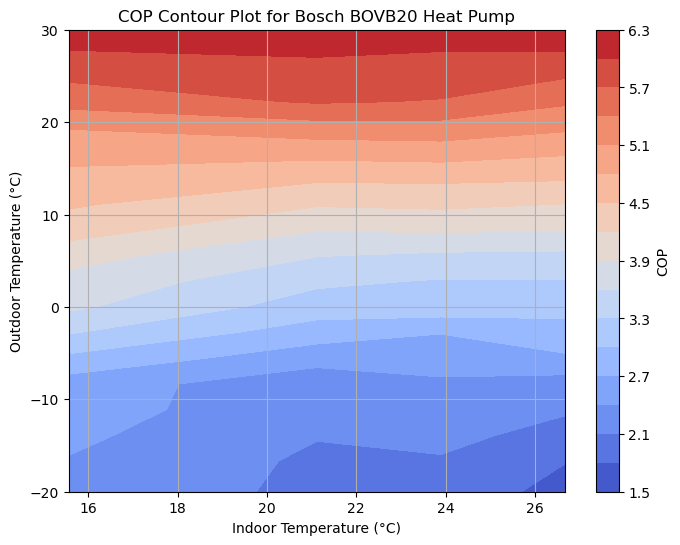

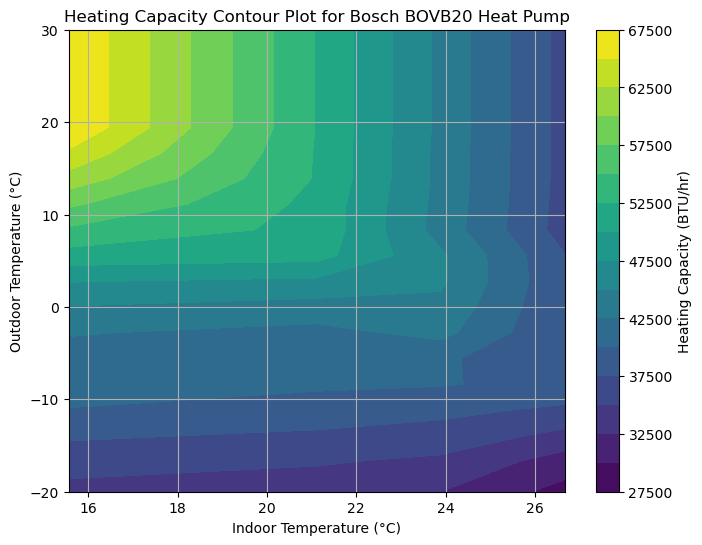

In [6]:
# Generate the plots
plot_contours(use_celsius=True)

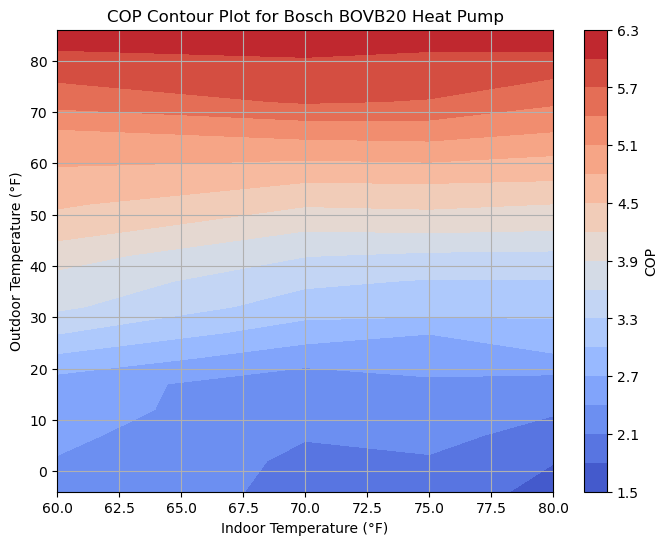

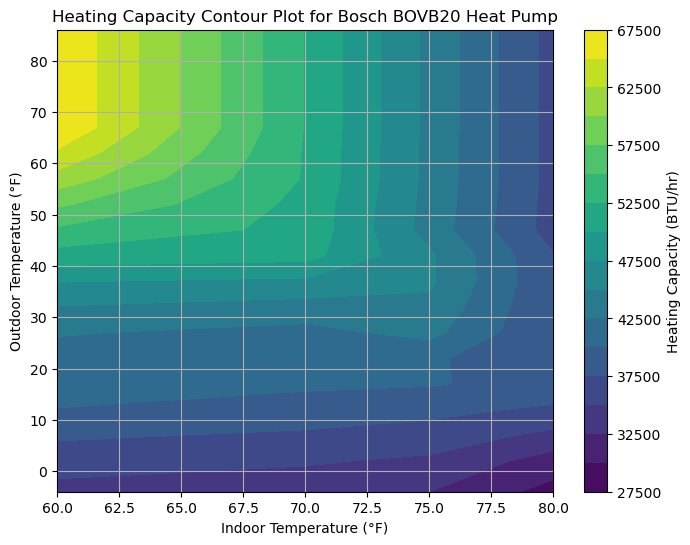

In [7]:
# Generate the plots
plot_contours(use_celsius=False)